In [56]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### 1.Reading and understanding data:

In [57]:
# reading the data file

bike = pd.read_csv("day.csv")

In [58]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [59]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 2.Data processing:

In [60]:
# identifing categorical and numerical variables

cat_cols = ["weekday", "weathersit", "season", "mnth"]          # to be casted into objects
con_cols = ["temp" ,"atemp" , "hum" , "windspeed"]              # to be scaled
bin_cols = ["yr", "holiday" , "workingday"]                 

In [61]:
# dropping uncessary variables

bike.drop(["instant", "dteday", "casual", "registered"],axis = 1, inplace =True)

In [62]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [63]:
# casting data types of variables
# season
def seas(x):
    return ({1 :"spring", 2 :"summer" , 3 :"fall" , 4 :"winter"})[x]

# month
def month(x):
    return ({ 1 :"jan" , 2 :"feb" ,  3:"mar" ,  4:"apr" ,  5:"may" ,  6:"jun" ,  7:"jul" ,  8:"aug" ,  9:"sep" ,  10:"oct" ,  11:"nov" ,  12:"dec" })[x]

# weekday
def weekday(x):
    return ({ 1:"mon" ,  2 :"tue" , 3:"wed" , 4:"thu" ,5: "fri" , 6:"sat" ,  0:"sun" })[x]

def weather(x):
    return ({1 :"clear" , 2 :"mist" ,3 : "light_rain" , 4 :"heavy_rain"})[x]


In [64]:
# replacing original values 

bike["season"] = bike["season"].map(seas)
bike["mnth"] = bike["mnth"].map(month)
bike["weekday"] = bike["weekday"].map(weekday)
bike["weathersit"] = bike["weathersit"].map(weather)

#### EDA:

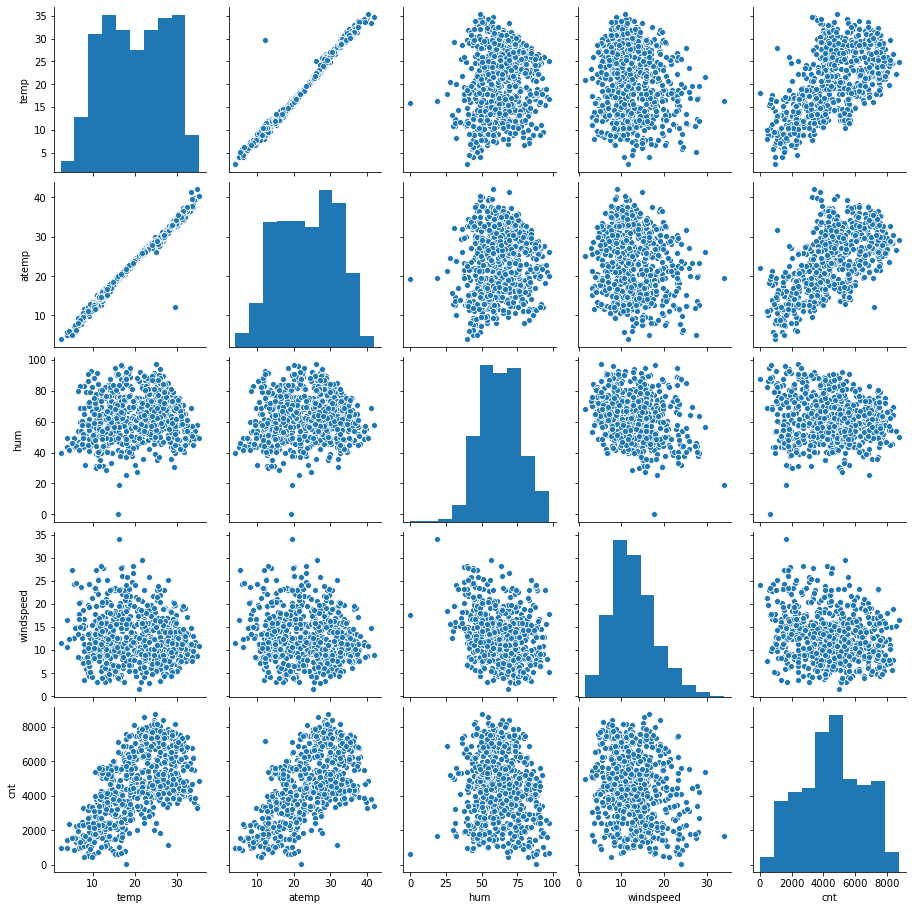

In [65]:
# pairplot of all numerical columns

sns.pairplot(bike[["temp","atemp","hum","windspeed", "cnt"]])
plt.show()

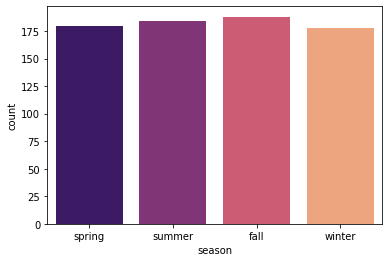

In [66]:
sns.countplot("season",data = bike, palette = "magma")
plt.show()

inference:
   - bikes demand decreases during winter  

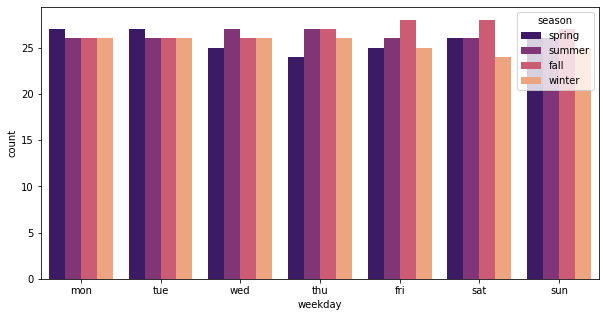

In [67]:
plt.figure(figsize = (10,5))
sns.countplot("weekday", hue="season", data =bike, palette = "magma")
plt.show()

inference: 
  - fridays and saturdays seems to have higher usage on fall season

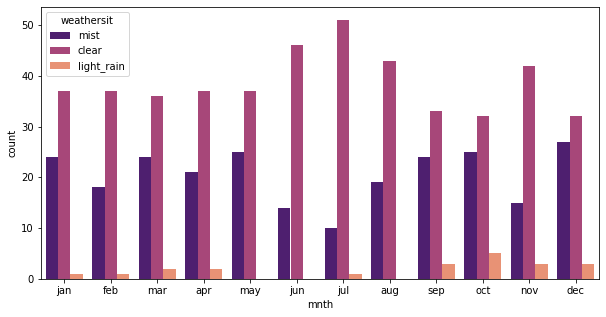

In [68]:
plt.figure(figsize = (10,5))
sns.countplot("mnth", hue="weathersit", data =bike, palette = "magma")
plt.show()

inference:
   - the usage of bikes continue to rise from may till aug provided with a clear weather
   - the usage diminishes when there is mist or light rain in the same months

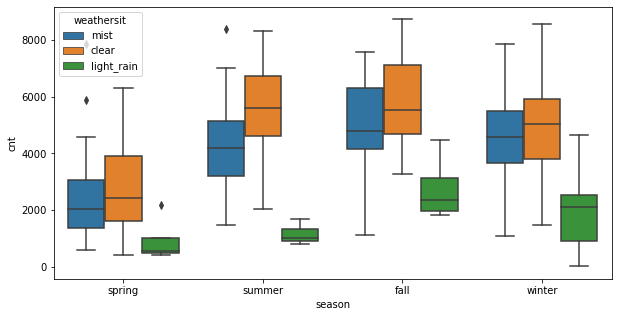

In [69]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "season" , y= "cnt", hue = "weathersit", data = bike)
plt.show()

inference:
   - bike sharing is on surge during fall and summer
   - more no of people prefer bikes during light rain on winters comapared to all other seasons

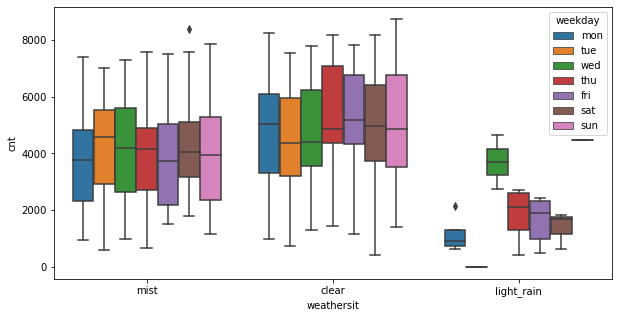

In [70]:
plt.figure(figsize = (10,5))
sns.boxplot(x =  "weathersit", y= "cnt", hue = "weekday", data = bike)
plt.show()

inference:
  - midweek seem to have higher demand for bikes
  - generally wednesdays to friday have a higher demand irrespective of the weather

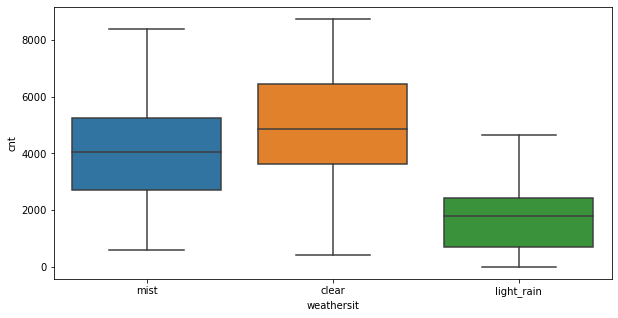

In [71]:
plt.figure(figsize = (10,5))
sns.boxplot(x = "weathersit" , y= "cnt", data = bike)
plt.show()

inference: 
   - most people prefer bikes during a clear weather
   - almost less or nobody prefers bikes during heavy rain

In [72]:
# reveiwing variables

bike.weekday.value_counts()

mon    105
tue    105
thu    104
sun    104
wed    104
fri    104
sat    104
Name: weekday, dtype: int64

In [73]:
# reveiwing columns/variables

bike.weathersit.value_counts()

clear         463
mist          246
light_rain     21
Name: weathersit, dtype: int64

In [74]:
# creating dummy varirables

col_dum = pd.get_dummies(bike,columns=cat_cols)

In [75]:
col_dum.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_fri,weekday_mon,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [76]:
# dividing the data set into train_test sets

np.random.seed(0)
df_train, df_test = train_test_split(col_dum, train_size = 0.70, random_state = 100)

In [77]:
# recheking datasets

print(df_train.shape)
print(df_test.shape)

(510, 34)
(220, 34)


In [78]:
# creating an object in the class for scaling

scaler = MinMaxScaler()

In [79]:
# performing Min_max_scaling
# scaling for test set is done seperately 

df_train[con_cols] = scaler.fit_transform(df_train[con_cols])

In [80]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,weekday_fri,weekday_mon,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,0,1,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,1683,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# dividing the datasets into X and y sets

y_train = df_train.pop("cnt")
X_train = df_train

In [82]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,weekday_fri,weekday_mon,weekday_sat,...,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sep
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.Model building and evaluation:

#### RFE:  

In [83]:
# RFE suggestion for 15 columns/variables

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [84]:
# viewing the listed columns by RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weekday_fri', False, 10),
 ('weekday_mon', False, 19),
 ('weekday_sat', False, 6),
 ('weekday_sun', False, 7),
 ('weekday_thu', False, 9),
 ('weekday_tue', False, 18),
 ('weekday_wed', False, 17),
 ('weathersit_clear', True, 1),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist', True, 1),
 ('season_fall', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_apr', False, 16),
 ('mnth_aug', False, 11),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 3),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 8),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 14),
 ('mnth_sep', True, 1)]

In [85]:
# filtering the suggested columns 

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'weathersit_clear',
       'weathersit_light_rain', 'weathersit_mist', 'season_fall',
       'season_spring', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_nov',
       'mnth_sep'],
      dtype='object')

In [86]:
# taking the suggested columns into consideration for further model building

X_train_rfe = X_train[col]

In [87]:

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [88]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.8
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          4.41e-189
Time:                        15:00:24   Log-Likelihood:                -4113.7
No. Observations:                 510   AIC:                             8257.
Df Residuals:                     495   BIC:                             8321.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1668.71

### VIF:

$ VIF_i = \frac{1}{1 - {R_i}^2} $

checking VIF to identify correlation with variables

In [89]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,weathersit_clear,inf
7,weathersit_light_rain,inf
8,weathersit_mist,inf
3,temp,3.97
9,season_fall,2.79
10,season_spring,2.75
11,season_winter,2.25
4,hum,1.90
12,mnth_jan,1.57
13,mnth_jul,1.49


In [90]:
# dropping variables suggested by VIF

X_train_rfe.drop(["weathersit_clear", "weathersit_light_rain", "weathersit_mist"],axis = 1, inplace =True )

In [91]:
# repeating the model:

X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [92]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 12 Apr 2021   Prob (F-statistic):          8.40e-174
Time:                        15:00:24   Log-Likelihood:                -4155.5
No. Observations:                 510   AIC:                             8337.
Df Residuals:                     497   BIC:                             8392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3718.2579    282.907     13.143

In [93]:
# rechecking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,56.86
3,temp,3.79
6,season_fall,2.78
7,season_spring,2.73
8,season_winter,2.22
9,mnth_jan,1.56
11,mnth_nov,1.49
10,mnth_jul,1.48
12,mnth_sep,1.31
4,hum,1.19


VIF shows a normalcy in every variable, since const is an intercept it an be ignored.

### 5.Residual analysis:

In [42]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

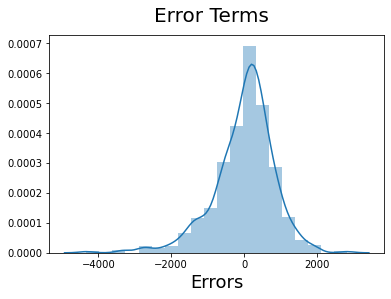

In [43]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)        

This shows that the residuals are normally distributed, thereby checking the assumptions.

### 6.Evaluation and prediction:

In [44]:
# scaling the variables in test dataset
# con_cols contain all the continuous columns

df_test[con_cols] = scaler.transform(df_test[con_cols])

In [45]:
y_test = df_test.pop("cnt")
X_test = df_test

In [46]:
# the list of columns that are part of the final trained model

same_cols = list(X_train_rfe.columns)
same_cols.remove("const")

In [47]:
# redifining the dataset

X_test = X_test[same_cols]
X_test = sm.add_constant(X_test)

In [48]:
y_test_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

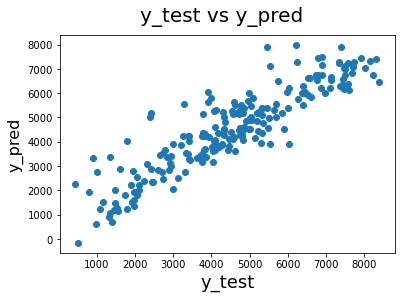

In [49]:
# evaluation

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [50]:
# checking the prediction dataset

r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.811951034253938

In [51]:
# rechecking for training dataset

r2 = r2_score(y_true = y_train, y_pred = y_train_pred)
r2

0.8157714329180196

Conclusion: 
   - As seen the above r2 score is moderately high, which shows that the model explains the relationship between the dependent and independent variables. 
   - public prefer bikes on clear weather
   - the demand rises in the summer and fall seasons